# The Cartpole Problem
## Georga Leisemann 2020
## SIT215 Project
### References:
https://github.com/IsaacPatole/CartPole-v0-using-Q-learning-SARSA-and-DNN/blob/master/Qlearning_for_cartpole.py<br>

https://gym.openai.com/envs/CartPole-v0/

In [1]:
#imports
import gym
import numpy as np
import math
import random
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
#initialise the env
env = gym.make('CartPole-v0')

# Random Policy Implementation

In [14]:
#initialise metric variables
total_epochs = 0
episodes = 1000
rand_ep_reward_list = []
ep_reward = 0

#loop through 100 episodes (100 different passengers)
for _ in range(episodes):
    #set current state to starting environment
    state = env.reset()
    epochs, reward = 0, 0
    
    #done = pole has fallen from cart
    done = False

    #while episode incomplete
    while not done:
        #view visualisation
        env.render()
        #select a random action
        action = env.action_space.sample()
        #take action
        state, reward, done, info = env.step(action)
        #update the sum of rewards for this episode
        ep_reward = ep_reward + reward

        epochs += 1

    #once 1000 episode are complete, sum total episodes and append list with rewards per episode
    total_epochs += epochs
    rand_ep_reward_list.append(ep_reward)
    ep_reward = 0

#store metrics
rand_avg_time = total_epochs / episodes

#print evaluation of agents performance. Greater number of timesteps = better performance
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {rand_avg_time}")

Results after 1000 episodes:
Average timesteps per episode: 22.227


# Q-Learning Training

In [11]:
# create buckets with upper and lower limits so that continuous state space can be discretised
num_buckets = 4
buckets = [
#cart position
np.linspace(-2.4, 2.4, num_buckets + 1)[1:-1],
#art velocity
np.linspace(-3.0, 3.0, num_buckets + 1)[1:-1],
#pole angle
np.linspace(-0.5, 0.5, num_buckets + 1)[1:-1],
#tip pole velocity
np.linspace(-2.0, 2.0, num_buckets + 1)[1:-1]
        ]

# create q-table of num_states * num_actions
num_actions = 2
max_buckets = max(len(buckets) for bucket in buckets)
num_states = (max_buckets + 1) ** len(buckets)
q_table = np.zeros(shape=(num_states, num_actions))

# Discretize the 4 variables for state and reduce them to a single integer representing state
def discretize_state(observation):
    state = sum(
        np.digitize(x=feature, bins=buckets[i]) * ((max_buckets + 1) ** i)
        for i, feature in enumerate(observation)
    )
    return state

In [12]:
%%time

# Hyperparameters
alpha = 0.2
gamma = 0.5
epsilon = 0.1

# For plotting metrics
all_epochs = []
ep_reward = 0
q_ep_reward_list = []

#train over 10,000 episodes
for i in range(1, 10001):
    state = discretize_state(env.reset())
    epochs, reward = 0, 0
    
    done = False
    
    #while 10,000 episodes are not complete
    while not done:
        #decide on exploration or exploitation based on comparison between random number (0-1) and epsilon
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        #take action
        next_state, reward, done, info = env.step(action) 
        next_state = discretize_state(next_state)
        #calculate total reward for this episode
        ep_reward = ep_reward + reward

        #get old q_value
        old_value = q_table[state, action]
        #obtain the maximum reward for next state
        next_max = np.max(q_table[next_state])
        #obtain new q value after action was taken
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        #update q_table with new q value
        q_table[state, action] = new_value

        #update state with new current state
        state = next_state
        epochs += 1

    #add total reward for each episode to a list
    q_ep_reward_list.append(ep_reward)
    ep_reward = 0

    #live update on current episode    
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 10000
Training finished.

CPU times: user 17.3 s, sys: 2.7 s, total: 20 s
Wall time: 19.2 s


# Q-Learning Implementation

In [13]:
#initialise metrics
total_epochs = 0
episodes = 100

#for each of the 100 episodes
for e in range(episodes):
    #set environment to initial environment
    state = env.reset()
    #discretise environment
    state = discretize_state(state)
    epochs, reward= 0, 0

    #False = pole has not fallen over
    done = False

    while not done:
        # Render environment
        env.render()
        #choose action based on best q value in q_table
        action = np.argmax(q_table[state])
        #update state, reward, done, info based on action
        state, reward, done, info = env.step(action)
        state = discretize_state(state)

        epochs += 1

    total_epochs += epochs

#store metrics
q_avg_time = total_epochs / episodes

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {q_avg_time}")

Results after 100 episodes:
Average timesteps per episode: 12.52


# Visualising Random-Policy VS Q-Learning

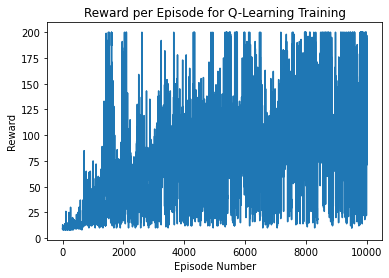

In [7]:
#plot the reward for each training episode -  q-learning
plt.plot(q_ep_reward_list)
plt.ylabel('Reward')
plt.xlabel('Episode Number')
plt.title("Reward per Episode for Q-Learning Training")
plt.show()

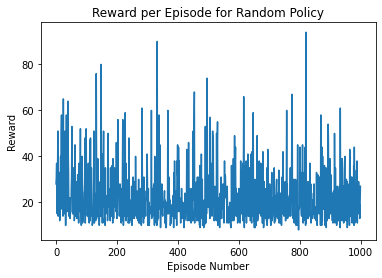

In [15]:
#plot the reward for each episode - random policy
plt.plot(rand_ep_reward_list)
plt.ylabel('Reward')
plt.xlabel('Episode Number')
plt.title("Reward per Episode for Random Policy")
plt.show()